## Bifurcation Diagram

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:


r_values = np.linspace(2.5, 4.0, 8000)   # fine resolution
n_iter = 1000                            # total iterations
last = 100                               # number of iterations to plot (after transient)
x0 = 0.5                                 # initial value



In [2]:
# Data Collection 
x = x0 * np.ones(len(r_values))
results_r = []
results_x = []

for i in range(n_iter):
    x = r_values * x * (1 - x)
    if i >= (n_iter - last):            # skip transients
        results_r.extend(r_values)
        results_x.extend(x)




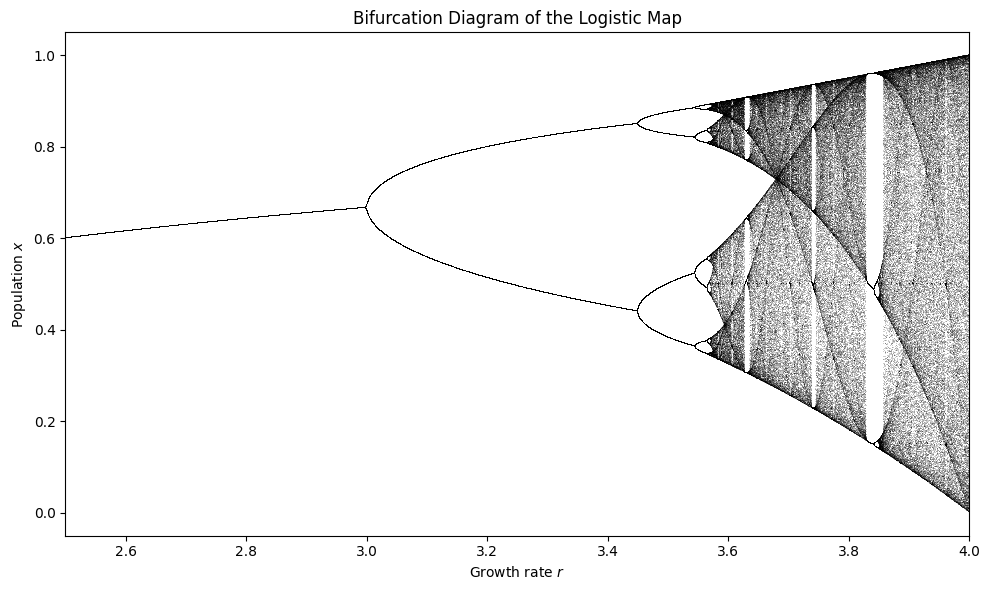

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_r, results_x, ',k', alpha=0.2)  
plt.title("Bifurcation Diagram of the Logistic Map")
plt.xlabel("Growth rate $r$")
plt.ylabel("Population $x$")
plt.xlim(2.5, 4.0)
plt.tight_layout()
plt.savefig("Data/bifurcation_placeholder.png", dpi=160)
plt.show()

# Sensitivity to Initial Conditions

In [9]:
# Parameters
r = 4.0
x0 = 0.5000
x1 = 0.5001
n = 50

# Allocate arrays
x_vals = np.empty(n)
y_vals = np.empty(n)
diff = np.empty(n)

# Initialize
x_vals[0] = x0
y_vals[0] = x1
diff[0] = abs(x0 - x1)

In [10]:
# Iterate through logistic map
for i in range(1, n):
    x_vals[i] = r * x_vals[i-1] * (1 - x_vals[i-1])
    y_vals[i] = r * y_vals[i-1] * (1 - y_vals[i-1])
    diff[i] = abs(x_vals[i] - y_vals[i])

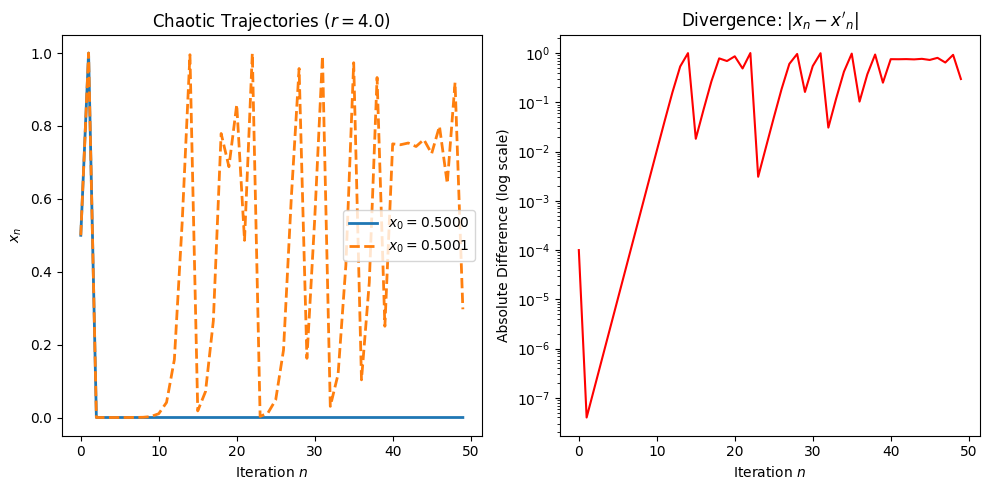

In [11]:
# Plotting
plt.figure(figsize=(10, 5))

# Trajectories
plt.subplot(1, 2, 1)
plt.plot(range(n), x_vals, label='$x_0 = 0.5000$', lw=2)
plt.plot(range(n), y_vals, label='$x_0 = 0.5001$', lw=2, linestyle='--')
plt.title("Chaotic Trajectories ($r = 4.0$)")
plt.xlabel("Iteration $n$")
plt.ylabel("$x_n$")
plt.legend()

# Difference (log scale)
plt.subplot(1, 2, 2)
plt.semilogy(range(n), diff, color='red')
plt.title("Divergence: $|x_n - x'_n|$")
plt.xlabel("Iteration $n$")
plt.ylabel("Absolute Difference (log scale)")

plt.tight_layout()
plt.savefig("sensitivity_placeholder.png", dpi=300)
plt.show()


# Feigenbaum Estimation

In [ ]:
# Bifurcation point estimates
r_bifurcations = [3.000, 3.449, 3.544, 3.564]

# Generate bifurcation data
r_values = np.linspace(2.9, 3.6, 7000)
n_iter = 1200
last = 150
x = 0.5 * np.ones_like(r_values)
r_result, x_result = [], []


In [17]:

for i in range(n_iter):
    x = r_values * x * (1 - x)
    if i >= (n_iter - last):
        r_result.extend(r_values)
        x_result.extend(x)



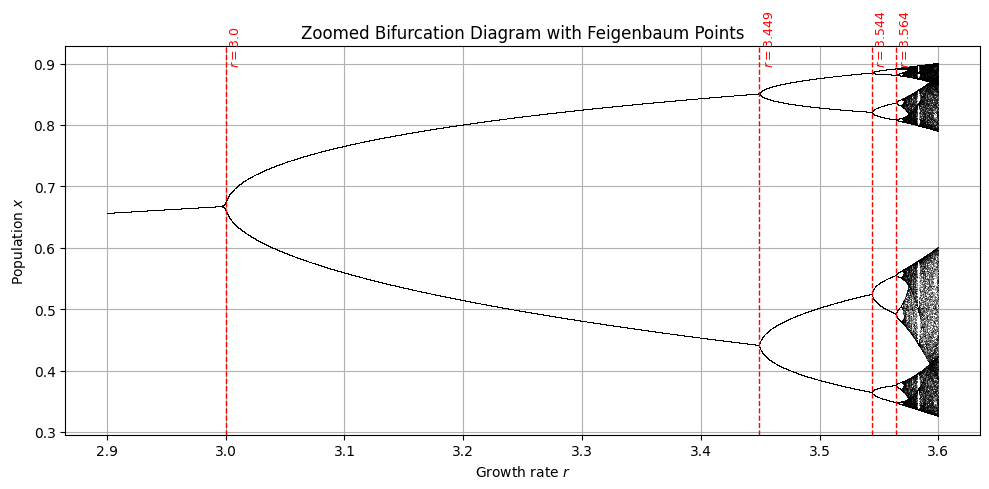

In [18]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(r_result, x_result, ',k', alpha=0.3)

# Add vertical lines at r1, r2, r3, r4
for r in r_bifurcations:
    plt.axvline(r, color='red', linestyle='--', linewidth=1)
    plt.text(r + 0.003, 0.9, f"$r = {r}$", rotation=90, color='red', fontsize=9)

plt.title("Zoomed Bifurcation Diagram with Feigenbaum Points")
plt.xlabel("Growth rate $r$")
plt.ylabel("Population $x$")
plt.grid(True)
plt.tight_layout()
plt.savefig("feigenbaum_zoomed_labeled.png", dpi=300)
plt.show()


In [ ]:
r_vals = [3.000, 3.449, 3.544, 3.564]
delta_vals = []


# Compute delta_n
for i in range(2, len(r_vals)):
    delta = (r_vals[i-1] - r_vals[i-2]) / (r_vals[i] - r_vals[i-1])
    delta_vals.append(delta)

# Prepare table
df = pd.DataFrame({
    "n": [2, 3],
    "r_{n-2}": r_vals[:-2],
    "r_{n-1}": r_vals[1:-1],
    "r_n": r_vals[2:],
    "delta_n": [f"{d:.4f}" for d in delta_vals]
})

display(df)
